Étudiante : Marwa El Kamil

**Titre :** Reconnaissance Faciale des Joueurs Marocains avec Réseaux de Neurones et HOG

**Introduction :**
Ce notebook présente une approche innovante pour la reconnaissance faciale des joueurs de football marocains. Il combine l'utilisation de réseaux de neurones (NN) et la technique de l'histogramme des orientations de gradient (HOG) pour extraire efficacement les caractéristiques des visages.

**Contenu :**

1. **Importation des Bibliothèques** :
   - Importation de TensorFlow, Keras pour les réseaux de neurones.
   - Utilisation de skimage pour HOG et d'autres outils de traitement d'images comme OpenCV.

2. **Prétraitement des Données** :
   - Chargement des images des joueurs.
   - Application de la transformation HOG sur chaque image.
   - Normalisation et redimensionnement des images pour les préparer à l'entrée du réseau neuronal.

3. **Construction du Réseau de Neurones** :
   - Définition de l'architecture du réseau de neurones, incluant les couches denses.
   - Compilation du modèle avec des métriques comme la précision.

4. **Entraînement du Modèle** :
   - Entraînement du modèle sur les données prétraitées.
   - Utilisation de la validation croisée pour évaluer la performance du modèle.

5. **Évaluation et Test du Modèle** :
   - Test du modèle sur un ensemble de données séparé.
   - Analyse des résultats et ajustement des paramètres si nécessaire.

6. **Prédiction et Visualisation des Résultats** :
   - Prédiction des labels pour de nouvelles images.
   - Affichage des résultats et comparaison avec les labels réels.


In [4]:
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
from imutils import paths
from pathlib import Path
import numpy as np
import imutils
import cv2
import os

In [5]:
def loadNewBD(inputPath):
    # Récupération des chemins de toutes les images dans le répertoire donné
    imagePaths = list(paths.list_images(inputPath))
   
    # Initialisation de listes pour stocker les visages et les étiquettes (labels)
    faces = list()
    labels = list()
 
    # Parcourir chaque chemin d'image
    for imagePath in imagePaths:
        # Lire l'image et récupérer le label (étiquette) de l'image
        # Le label est généralement dérivé du nom de fichier
        image = cv2.imread(imagePath) # Lire l'image à l'aide de OpenCV
        name = Path(imagePath).stem   # Extraire le nom de fichier sans extension comme label

        # Ajouter l'image et son label respectif aux listes
        faces.append(image) # Ajouter l'image à la liste des visages
        labels.append(name) # Ajouter le label à la liste des labels

    # Convertir les listes de visages et de labels en tableaux NumPy pour un traitement ultérieur
    faces = np.array(faces)
    labels = np.array(labels)

    # Retourner le tuple contenant les visages et les labels
    return (faces, labels)

cette fonction "loadNewBD" qui prend un chemin vers un dossier contenant des images. Il lit chaque image, extrait son nom comme label, et stocke les images et leurs labels respectifs dans des listes, qui sont ensuite converties en tableaux NumPy avant d'être retournées. Cette fonction est utile pour charger des données d'image pour des tâches de reconnaissance ou de traitement d'image.

In [6]:
(visages, names) = loadNewBD("data_players")

In [7]:
names

array(['Walid Reguragui_215', 'Anass Zeroury_127', 'Anass Zeroury_133',
       'saiss_193', 'saiss_187', 'boukhlal_153', 'boukhlal_147',
       'boukhlal_146', 'boukhlal_152', 'saiss_186', 'saiss_192',
       'Anass Zeroury_132', 'Anass Zeroury_126', 'Walid Reguragui_214',
       'Walid Reguragui_216', 'Anass Zeroury_130', 'Anass Zeroury_124',
       'Anass Zeroury_118', 'saiss_184', 'saiss_190', 'aguerd_109',
       'boukhlal_144', 'boukhlal_150', 'boukhlal_151', 'boukhlal_145',
       'aguerd_108', 'saiss_191', 'saiss_185', 'Anass Zeroury_119',
       'Anass Zeroury_125', 'Anass Zeroury_131', 'Walid Reguragui_217',
       'Walid Reguragui_207', 'Walid Reguragui_213', 'Anass Zeroury_135',
       'Anass Zeroury_121', 'saiss_195', 'boukhlal_141', 'boukhlal_155',
       'boukhlal_154', 'boukhlal_140', 'saiss_194', 'Anass Zeroury_120',
       'Anass Zeroury_134', 'Walid Reguragui_212', 'Walid Reguragui_206',
       'Walid Reguragui_210', 'Anass Zeroury_122', 'Anass Zeroury_136',
       's

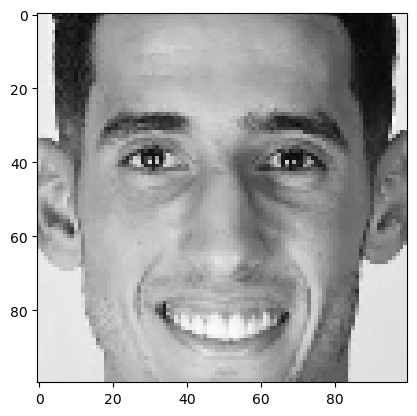

In [8]:
 plt.imshow(visages[20], cmap = 'gray')

In [9]:
def extractingLabels(names):
    # Initialisation d'une liste vide pour les labels
    labels = []

    # Parcourir chaque nom dans la liste des noms
    for name in names:
        # Extraire le label en retirant les trois derniers caractères
        # et ajouter ce label à la liste des labels
        labels.append(name[:len(name)-3])

    # Convertir la liste des labels en un tableau NumPy
    labels = np.array(labels)

    # Retourner le tableau des labels
    return labels


In [14]:
Labels = extractingLabels(names)
Labels

array(['Walid Reguragui_', 'Anass Zeroury_', 'Anass Zeroury_', 'saiss_',
       'saiss_', 'boukhlal_', 'boukhlal_', 'boukhlal_', 'boukhlal_',
       'saiss_', 'saiss_', 'Anass Zeroury_', 'Anass Zeroury_',
       'Walid Reguragui_', 'Walid Reguragui_', 'Anass Zeroury_',
       'Anass Zeroury_', 'Anass Zeroury_', 'saiss_', 'saiss_', 'aguerd_',
       'boukhlal_', 'boukhlal_', 'boukhlal_', 'boukhlal_', 'aguerd_',
       'saiss_', 'saiss_', 'Anass Zeroury_', 'Anass Zeroury_',
       'Anass Zeroury_', 'Walid Reguragui_', 'Walid Reguragui_',
       'Walid Reguragui_', 'Anass Zeroury_', 'Anass Zeroury_', 'saiss_',
       'boukhlal_', 'boukhlal_', 'boukhlal_', 'boukhlal_', 'saiss_',
       'Anass Zeroury_', 'Anass Zeroury_', 'Walid Reguragui_',
       'Walid Reguragui_', 'Walid Reguragui_', 'Anass Zeroury_',
       'Anass Zeroury_', 'saiss_', 'boukhlal_', 'boukhlal_', 'boukhlal_',
       'saiss_', 'Anass Zeroury_', 'Walid Reguragui_', 'YassineBono_',
       'photo hakimi_', 'photo hakimi_', 'p

La fonction extractingLabels prend en entrée une liste de noms et extrait des étiquettes (labels) en retirant les trois derniers caractères de chaque nom.

In [36]:
from sklearn.preprocessing import LabelEncoder

def encode(labels):
    # Créer une instance de LabelEncoder
    le = LabelEncoder()

    # Ajuster le LabelEncoder aux étiquettes fournies et les transformer
    # Cela convertit les étiquettes en valeurs numériques
    labels = le.fit_transform(labels)

    # Retourner les étiquettes transformées
    return labels


LabelEncoder : Cette classe de scikit-learn est utilisée pour transformer des étiquettes non numériques (comme des noms de catégories) en valeurs numériques. Ceci est souvent nécessaire dans le traitement de données, car de nombreux algorithmes de machine learning préfèrent travailler avec des données numériques.
fit_transform() : Cette méthode ajuste le modèle LabelEncoder aux données fournies et, en même temps, transforme les étiquettes en valeurs numériques. Chaque classe unique se voit attribuer un entier unique.

In [16]:
labels = encode(Labels)
labels

array([1, 0, 0, 6, 6, 4, 4, 4, 4, 6, 6, 0, 0, 1, 1, 0, 0, 0, 6, 6, 3, 4,
       4, 4, 4, 3, 6, 6, 0, 0, 0, 1, 1, 1, 0, 0, 6, 4, 4, 4, 4, 6, 0, 0,
       1, 1, 1, 0, 0, 6, 4, 4, 4, 6, 0, 1, 2, 5, 5, 5, 5, 2, 2, 2, 5, 5,
       5, 2, 2, 4, 2, 2, 5, 5, 2, 5, 5, 4, 4, 5, 5, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 1, 1, 3, 3, 1, 1, 6, 6, 3, 3, 3, 6,
       1, 6, 6, 1, 0, 6, 3, 3, 4, 3, 3, 6, 0, 0, 6, 6, 1, 1, 0, 3, 3, 3,
       3, 0, 1, 6])

In [17]:
from skimage.feature import hog
from skimage import exposure
import cv2

def HOG(face):
    # Convertir l'image de visage en niveaux de gris
    # Le HOG est généralement calculé sur des images en niveaux de gris
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

    # Calculer l'histogramme des orientations de gradient (HOG) pour l'image
    # visualize=True permet de retourner l'image du gradient HOG en plus du descripteur
    fd, hog_image = hog(face, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, channel_axis=None)

    # Retourner l'image HOG
    return hog_image


La fonction HOG est conçue pour calculer l'histogramme des orientations de gradient (HOG) d'une image de visage. Elle utilise la bibliothèque skimage pour cette tâche. 

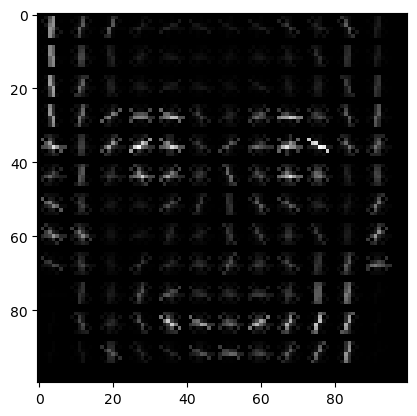

In [18]:
im = HOG(visages[20])
plt.imshow(im, cmap = 'gray')

In [19]:
def extractHOGBD(faces):
    # Initialiser une liste pour stocker les caractéristiques HOG des visages
    facesHOG = []

    # Parcourir chaque visage dans la liste fournie
    for i in range(len(faces)):
        # Appliquer la fonction HOG sur le visage actuel
        hog = HOG(faces[i])

        # Ajouter les caractéristiques HOG du visage à la liste
        facesHOG.append(hog)

    # Convertir la liste des caractéristiques HOG en un tableau NumPy
    facesHOG = np.array(facesHOG)

    # Retourner le tableau des caractéristiques HOG
    return facesHOG


La fonction extractHOGBD vise à appliquer la fonction HOG à chaque image dans un ensemble de données d'images de visages (faces) pour extraire leurs caractéristiques en utilisant l'histogramme des orientations de gradient (HOG). Elle stocke ensuite ces caractéristiques HOG dans un tableau NumPy et le retourne

In [20]:
faces = extractHOGBD(visages)

In [21]:
from sklearn.model_selection import train_test_split
def split(faces, labels):
        x_train , x_test , y_train , y_test = train_test_split(faces , labels , test_size =0.20, shuffle = True, stratify = labels )
        return  x_train , x_test , y_train , y_test

In [22]:
x_train , x_test , y_train , y_test = split(faces,labels)


In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(108, 100, 100)
(28, 100, 100)
(108,)
(28,)


In [24]:
x_train = x_train /255
x_test = x_test/ 255

In [25]:
x_train_flattened = x_train.reshape(len(x_train),100*100)
x_test_flattened = x_test.reshape(len(x_test),100*100)

In [26]:
from tensorflow import keras

# Définir l'architecture du modèle de réseau de neurones
model = keras.Sequential([
    # Première couche dense avec 100 neurones
    # Utilisation de la fonction d'activation 'sigmoid'
    # input_shape est défini pour correspondre à la taille des données d'entrée aplaties (100*100)
    keras.layers.Dense(100, input_shape=(100*100,), activation='sigmoid'),

    # Deuxième couche dense (couche de sortie) avec 7 neurones, correspondant au nombre de classes
    # Utilisation de la fonction d'activation 'softmax' pour la classification multiclasse
    keras.layers.Dense(7, activation='softmax'),
])

# Compilation du modèle
# Optimiseur 'adam' pour l'ajustement des poids
# Fonction de perte 'sparse_categorical_crossentropy' adaptée pour la classification multiclasse
# Suivi de la métrique 'accuracy' pour évaluer les performances du modèle
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entraînement du modèle sur les données d'entraînement
# x_train_flattened contient les données d'entrée aplaties
# y_train contient les labels correspondants
# Le modèle est entraîné sur 250 epochs
model.fit(x_train_flattened, y_train, epochs=250)


Epoch 1/250
4/4 [==============================] - 0s 3ms/step - loss: 2.1330 - accuracy: 0.1389
Epoch 2/250
4/4 [==============================] - 0s 2ms/step - loss: 1.9389 - accuracy: 0.2130
Epoch 3/250
4/4 [==============================] - 0s 3ms/step - loss: 1.8563 - accuracy: 0.2963
Epoch 4/250
4/4 [==============================] - 0s 3ms/step - loss: 1.8101 - accuracy: 0.4444
Epoch 5/250
4/4 [==============================] - 0s 3ms/step - loss: 1.7706 - accuracy: 0.6296
Epoch 6/250
4/4 [==============================] - 0s 2ms/step - loss: 1.7258 - accuracy: 0.5833
Epoch 7/250
4/4 [==============================] - 0s 2ms/step - loss: 1.6847 - accuracy: 0.5556
Epoch 8/250
4/4 [==============================] - 0s 2ms/step - loss: 1.6443 - accuracy: 0.5185
Epoch 9/250
4/4 [==============================] - 0s 2ms/step - loss: 1.5982 - accuracy: 0.5278
Epoch 10/250
4/4 [==============================] - 0s 3ms/step - loss: 1.5667 - accuracy: 0.5648
Epoch 11/250
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 1.0000
Epoch 168/250
4/4 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 1.0000
Epoch 169/250
4/4 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 1.0000
Epoch 170/250
4/4 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 1.0000
Epoch 171/250
4/4 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 1.0000
Epoch 172/250
4/4 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 1.0000
Epoch 173/250
4/4 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch 174/250
4/4 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 1.0000
Epoch 175/250
4/4 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 1.0000
Epoch 176/250
4/4 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 1.0000
Epoch 177/250
4/4 [=====

In [29]:
score = model.evaluate(x_test_flattened, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 10ms/step - loss: 0.4667 - accuracy: 0.8929
Test loss: 0.46665045619010925
Test accuracy: 0.8928571343421936


In [31]:
import cv2
import numpy as np
from tensorflow import keras

labels_map = {
    0: 'Zaroury',
    1: 'Regueragui',
    2: 'Bono',
    3: 'Aguerd',
    4: 'Boukhlal',
    5: 'Hakimi',
    6: 'Sais'
}
# Chargement de l'image
new_img2 = cv2.imread('hakimi.png')

# Application de la transformation HOG à l'image
new_img2 = HOG(new_img2)

# Redimensionnement de l'image à 100x100 pixels
new_img2 = cv2.resize(new_img2, (100, 100))

# Normalisation de l'image en divisant par 255
new_img2 = new_img2 / 255.

# Aplatir l'image pour la prédiction
new_img_flattened = new_img2.reshape(1, 100*100)

# Utilisation du modèle pour prédire l'étiquette de la nouvelle image
predicted_label = model.predict(new_img_flattened)

# Obtention de l'étiquette avec la plus haute probabilité
predicted_label = np.argmax(predicted_label)
original_label = labels_map[predicted_label]

# Affichage de l'étiquette prédite
print("L'étiquette prédite pour la nouvelle image est :", original_label)


1/1 [==============================] - 0s 13ms/step
L'étiquette prédite pour la nouvelle image est : Hakimi


In [32]:
labels_map = {
    0: 'Zaroury',
    1: 'Regueragui',
    2: 'Bono',
    3: 'Aguerd',
    4: 'Boukhlal',
    5: 'Hakimi',
    6: 'Saiss'
}
new_img2 = cv2.imread('saiss.png')

# Resize and normalize the image
new_img2 = HOG(new_img2)
new_img2 = cv2.resize(new_img2, (100, 100))
new_img2 = new_img2 / 255.

# Flatten the image
new_img_flattened = new_img2.reshape(1, 100*100)

# Use the model to predict the label of the new image
predicted_label = model.predict(new_img_flattened)

# Get the label with the highest probability
predicted_label = np.argmax(predicted_label)
original_label = labels_map[predicted_label]
print("The predicted label for new image is:",  original_label)


1/1 [==============================] - 0s 10ms/step
The predicted label for new image is: Sais


In [35]:
labels_map = {
    0: 'Zaroury',
    1: 'Regueragui',
    2: 'Bono',
    3: 'Aguerd',
    4: 'Boukhlal',
    5: 'Hakimi',
    6: 'Sais'
}
new_img2 = cv2.imread('regragui.jpeg')

# Resize and normalize the image
new_img2 = HOG(new_img2)
new_img2 = cv2.resize(new_img2, (100, 100))
new_img2 = new_img2 / 255.

# Flatten the image
new_img_flattened = new_img2.reshape(1, 100*100)

# Use the model to predict the label of the new image
predicted_label = model.predict(new_img_flattened)

# Get the label with the highest probability
predicted_label = np.argmax(predicted_label)
original_label = labels_map[predicted_label]
print("The predicted label for new image is:",  original_label)

1/1 [==============================] - 0s 8ms/step
The predicted label for new image is: Regueragui
